## Initialisation

On charge les modules nécessaires :
* `matplotlib`, un module python pour faire des graphiques
* `settings` qui définit des paramètres de configuration
* `dbwalk`, un module fait maison qui s'interface à la BD

In [2]:
import matplotlib.pyplot as plt
import settings as cf
from dbwalk import Session, WishTable, MembershipTable, ActivityTable

## Ouverture d'une session sur le serveur

On se connecte à la base de données. Si les 2 valeurs demandées ci-dessous ne sont pas renseignées, on se connecte avec les valeurs définies dans `settings.py`.

In [3]:
session = Session()
user = input(f"User name (empty for default) : ")
passwd = input("Password (empty for default) : ")

session.open()

User name (empty for default) :  
Password (empty for default) :  


0

## Récupération des tables

### UATL_Membership
On récupère la table `UATL_Membership` depuis le serveur.
Son contenu est stocké localement dans un fichier temporaire.

Puis on épure : on garde seulement les lignes et colonnes qui nous intéressent.

In [4]:
membership_query = session.query(cf.MEMBERSHIP_QUERY)
print(f"stockée dans {membership_query}")

mt = MembershipTable(membership_query)
mt.adjust()
print(mt)

stockée dans /tmp/mysession_query337
             Status     CreatedDateTime     Id  MemberId  Year_Code
39856         Payed 2025-01-09 10:55:18  43891      9373         14
39857         Payed 2025-01-09 11:04:02  43892      9372         14
39858         Payed 2025-01-21 16:05:34  43893      2016         14
39859         Payed 2025-01-21 17:17:24  43894      9374         14
39860         Payed 2025-03-21 17:15:46  43895      8637         14
...             ...                 ...    ...       ...        ...
42734         Payed 2025-06-14 10:38:32  47485      7206         15
42735         Payed 2025-06-14 15:30:42  47486      9811         15
42736         Payed 2025-06-14 16:28:37  47487      1682         15
42737  WaitPayement 2025-06-14 16:59:43  47488      4651         15
42738  WaitPayement 2025-06-14 18:44:54  47489      2859         15

[2883 rows x 5 columns]


### UATL_Activity
On récupère la table `UATL_Activity` depuis le serveur.
Son contenu est stocké localement dans un fichier temporaire.

Puis on épure : on garde seulement les lignes et colonnes qui nous intéressent.

In [5]:
activity_query = session.query(cf.ACTIVITY_QUERY)
print(f"stockée dans {activity_query}")

at = ActivityTable(activity_query)
at.adjust()
print(at)

stockée dans /tmp/mysession_query338
        Id Reference                                           Label  \
2444  4006      3108                             L'URSS sous Staline   
2481  4047      4130                          Informatique familiale   
2517  4085      5310                              Musique de chambre   
2539  4108      6551                                  Atelier Pop-Up   
2547  4116      6130                            Dentelle aux fuseaux   
...    ...       ...                                             ...   
4465  6078      3172       Existence commune et évènement historique   
4484  6097      5400                                       Orchestre   
4494  6107      9082  ACTIVITITE A TICKET : Confiserie du 25/11/2024   
4515  6128      5314                                     Enluminure    
4519  6134      7491                  Do-in, souplesse et relaxation   

          Cycle  LeaningCycleYear  \
2444  Pedagogic               2.0   
2481        NaN         

### UATL_Wish
On récupère la table `UATL_Wish` depuis le serveur.
Son contenu est stocké localement dans un fichier temporaire.

Puis on épure : on garde seulement les lignes et colonnes qui nous intéressent.

In [6]:
wish_query = session.query(cf.WISH_QUERY)
print(f"stockée dans {wish_query}")

wt = WishTable(wish_query)
wt.adjust()
print(wt)

stockée dans /tmp/mysession_query336


/home/data/jaclin/devel/uatl/dbwalk/dbwalk.py:37: DtypeWarning: Columns (7,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


            Id  Order Status                Date  MembershipId  ActivityId  \
122516  149673      3  Valid 2025-01-06 11:40:05         41269        5803   
122517  149674      5  Valid 2025-01-06 12:04:16         41234        5803   
122518  149675      2  Valid 2025-01-06 16:13:52         42144        5803   
122519  149676      3  Valid 2025-01-08 10:26:51         41074        5569   
122520  149677      6  Valid 2025-01-08 10:36:44         43291        5798   
...        ...    ...    ...                 ...           ...         ...   
133593  160751      5  Valid 2025-06-15 11:44:07         47140        5926   
133594  160752      3  Valid 2025-06-15 15:32:24         44548        5915   
133595  160753      4  Valid 2025-06-15 17:05:57         45848        5859   
133596  160754      5  Valid 2025-06-15 17:06:10         45848        5974   
133597  160755      6  Valid 2025-06-15 17:08:17         45848        6041   

       ProcessStatus         RandomTIV  year  
122516      Reta

<Axes: >

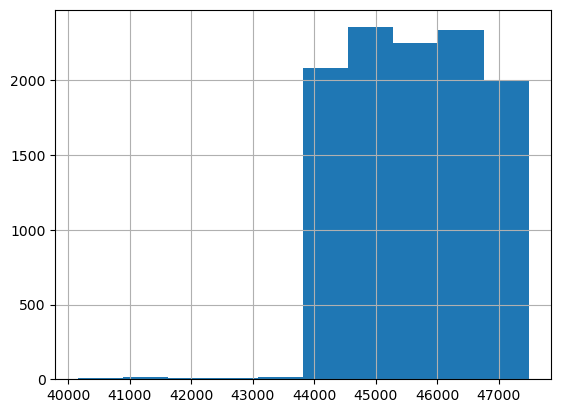

In [7]:
# n'importe quoi, juste pour voir comment faire un graphique
wt.df["MembershipId"].hist()
